### Numpy basics

In [2]:
import numpy as np

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [ ]:
from numpy import mean
m = np.arange(12).reshape((3,4))
ov_mean = mean(m)
raw_mean = m.mean(axis = 1)
col_mean = m.mean(axis = 0)
print(m)
print("overal mean is:", ov_mean)
print("raw mean is:", raw_mean)
print("column mean is:", col_mean)

2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [ ]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
#Using the function outer in numpy
outer1 = np.outer(u,v)
print("The outer product value using numpy is:\n", outer1)
#Using a nested for loop or list comprehension
outer2 = [ i*v for i in u ]
print("The outer product value using list comprehension is:\n", outer2)
#Using numpy broadcasting operatoins
outer3 = u[:, np.newaxis] * v
print("The outer product value using numpy broadcasting operations is:\n", outer3)

3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [ ]:
uniform = np.random.rand(10,6)
print(uniform)

a = np.where(uniform < 0.1)

uniform[a[0]] = 0
print ("the modified array\n:", uniform,'\n')

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [ ]:
from math import pi
import matplotlib as plot
b = np.linspace(0,2*pi,100)
print('original array:\n',b)
tenth = b[::10]
print('10th elements of the array:\n',tenth)
reverse = b[::-1]
print('reversed array is:\n', reverse)

mask = np.array([abs(np.sin(b) - np.cos(b)) < 0.1])
points = b[mask[0]]
print('The values of the array where |sin(b) - cos(b)|<0.1 is:',points)

plt.plot(b,np.sin(b))
plt.plot(b,np.cos(b))
plt.plot(points,np.sin(points), 'ro')
plt.plot(points,np.cos(points), 'bo')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [ ]:
def mult_table(n):
    rng = np.arange(1, n+1)
    return rng * rng[:, None]

print(mult_table(10))
#trace
trace = np.trace(mult_table(10))
print('trace:',trace)

#anti_diagonal
anti_diagonal = np.fliplr(mult_table(10)).diagonal()
print('anti-diagonal:', anti_diagonal)

#offset
offset = np.diagonal(mult_table(10), offset=1)
print('with offset:', offset)

6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [ ]:
dist = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
grid = np.array(abs(dist-np.array([dist]).T))

print("The 2D grid of distances among each city along Route 66 in miles:\n", grid)

grid_km = (grid * 1.60934)
print("The 2D grid of distances among each city along Route 66 in km:\n", grid_km)

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [12]:
def prime_num(N):
    #Mask initialization
    mask = np.ones(N, dtype=bool) 
    for i in range(2,N):
        k=2
        while i*k<N:
            mask[i*k]=False
            k+=1 

    #Prime numbers calculation
    prime_num = np.arange(N)
    prime_num = prime_num[mask == True]
    return prime_num

print(prime_num(100))
%timeit prime_num(60000)

#sieve of Eratosthenes
def prime_num_Era(N):
    #Mask initialization
    mask=np.ones(N, dtype=bool)
    for i in range(2,int(np.sqrt(N))):
        if mask[i] == True:
            k=i**2   
        while k<N:
            mask[k] = False
            k+=i 

    #Prime numbers calculation
    prime_num_Era = np.arange(N)
    prime_num_Era = prime_num_Era[mask == True]
    return prime_num_Era

print("With sieve of Eratosthenes:",prime_num(100))
%timeit prime_num_Era(60000)


[ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
157 ms ± 4.71 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
With sieve of Eratosthenes: [ 0  1  2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79
 83 89 97]
19.8 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

the mean of the squared distances at each step is: [   1    1    2 ... 1965 1972 1972]
walk ditance is: [[  1   2   1 ...  -4  -5  -4]
 [ -1   0   1 ... -18 -17 -18]
 [  1   0   1 ...  -4  -5  -4]
 ...
 [  1   2   3 ... -62 -61 -62]
 [ -1   0  -1 ... -20 -21 -22]
 [  1   0  -1 ... -26 -27 -26]]


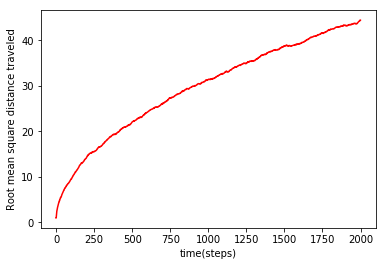

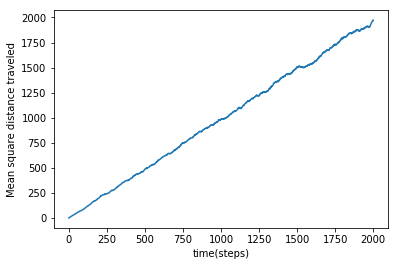

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def rand_walk(walk, steps):
    
    a_steps=np.array(np.random.randint(2,size = (walk,steps)))
    a_steps[a_steps==0] = -1
    
    #Walking distances
    walk_dis = np.cumsum(a_steps,axis=1)
    
    #Square of distances
    sq_walk = walk_dis**2
    
    #Means 
    mean_wsq = np.mean(sq_walk,axis=0,dtype=int)
    
    return walk_dis, mean_wsq

walker = 1000
steps = 2000
walk_dis, mean_wsq = rand_wlk(walker,steps)
s = np.arange(steps)

print("the mean of the squared distances at each step is:",mean_wsq)
print("walk ditance is:",walk_dis)

plt.xlabel('time(steps)')
plt.ylabel('Root mean square distance traveled')
plt.plot(s, np.sqrt(mean_wsq),'r')
plt.show()
 
plt.xlabel('time(steps)')
plt.ylabel('Mean square distance traveled')
plt.plot(s,mean_wsq)
plt.show()



9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [24]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-11-02 18:03:58--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.72.1
Connecting to www.dropbox.com (www.dropbox.com)|162.125.72.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2020-11-02 18:03:59--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc8e2006773e42a0332ff1d3eaa.dl.dropboxusercontent.com/cd/0/inline/BCcHDaMfKqS5EPEvy74RajdmmMQ9E-RcsNCSCnSlo34HtXLc0kyuhQyx1JISy4vITwqZcN1gNIyopo-gPU3ZKw4h0qiVyN875rHzqWsbPyD8Lw/file# [following]
--2020-11-02 18:03:59--  https://ucc8e2006773e42a0332ff1d3eaa.dl.dropboxusercontent.com/cd/0/inline/BCcHDaMfKqS5EPEvy74RajdmmMQ9E-RcsNCSCnSlo34HtXLc0kyuhQyx1JISy4vITwqZcN1gNIyopo-gPU3ZKw4h0qiVyN875rHzqWsbPyD8Lw/file
Resolving ucc8e2006773e42a0332ff1d3

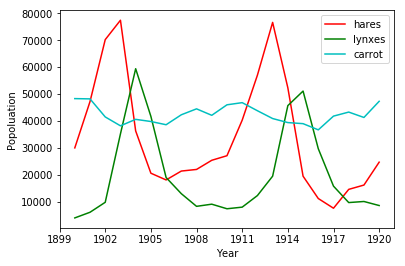


 Correlation coefficients:
[[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]

 hares
mean 34080.95238095238
std 20897.906458089667
min 7600.0
max 77400.0

 lynxes
mean 20166.666666666668
std 16254.591536908763
min 4000.0
max 59400.0

 carrots
mean 42400.0
std 3322.5062255844787
min 36700.0
max 48300.0
Highier population per year

years,  hares,  lynxes,  carrots
 [[ 1900.     0.     0. 48300.]
 [ 1901.     0.     0. 48200.]
 [ 1902. 70200.     0.     0.]
 [ 1903. 77400.     0.     0.]
 [ 1904.     0. 59400.     0.]
 [ 1905.     0. 41700.     0.]
 [ 1906.     0.     0. 38600.]
 [ 1907.     0.     0. 42300.]
 [ 1908.     0.     0. 44500.]
 [ 1909.     0.     0. 42100.]
 [ 1910.     0.     0. 46000.]
 [ 1911.     0.     0. 46800.]
 [ 1912. 57000.     0.     0.]
 [ 1913. 76600.     0.     0.]
 [ 1914. 52300.     0.     0.]
 [ 1915.     0. 51100.     0.]
 [ 1916.     0.     0. 36700.]
 [ 1917.     0.     0. 41800.]
 [ 1918

In [31]:
from matplotlib.ticker import MaxNLocator

file_name = "populations.txt"
data = np.array(np.loadtxt(file_name))

years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

#showing the plot better
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.plot(years, hares, 'r', label='hares')
plt.plot(years, lynxes, 'g', label='lynxes')
plt.plot(years, carrots, 'c', label='carrot')
plt.xlabel('Year')
plt.ylabel('Popoluation')
plt.legend()
plt.show()



names=['hares','lynxes','carrots']

print('\n Correlation coefficients:')
print(np.corrcoef((hares,lynxes,carrots)))

k=0
for i in [hares,lynxes,carrots]:
    print('\n',names[k])
    for function in ['mean', 'std', 'min', 'max']:
        print(function, getattr(np, function)(i))
    k+=1
    


#Highest population
for i in np.arange(data.shape[0]):
    data[i,1:][data[i,1:] != np.max(data[i,1:])] = 0
    
print('Highier population per year')
print('\nyears,  hares,  lynxes,  carrots\n',data)
